<a href="https://colab.research.google.com/github/DODHIAMBOO/Python-projects/blob/main/phase_1_project_movie_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

Please fill out:
* Student name: Janet Khainza
* Student pace: Part time
* Scheduled project review date/time:
* Instructor name: Diana Mong'ina/ Noah Kandie
* Blog post URL:


## Phase 1 Project Movie Analysis

![image.jpg](attachment:image.jpg)

Microsoft wants to enter into the movie industry, however they have no prior knowledge of the industry and they need help so that their movie studio can be successful.

As my first project, I will be analyzing movie datasets from IMDb, tmdb (the movie database, and Box Office Mojo to create actionable insight that Microsoft can use to start a film studio.

Some of the most important questions that I will be answering are:

1. How many movies are being made of each genre?
2. What genres are the most successful, both in terms of audience rating and gross earnings?
3. Of the top grossing films, which genres were most successful (had the highest gross earnings)?

Now that it is clear what questions to answer with the datasets, I will perform exploratory data analysis (EDA) of the movie industry, by first reading my datasets and loading them into the Jupyter notebook, thereafter I will clean the data in pandas dataframe and visualize my findings using seaborn and matplotlib. I will describe some of the methodology I  use for loading data, cleaning as well as provide some of the recommendations for Microsoft in order to be successful as a movie studio.


In [ ]:
# importing the packages I will be using for this project
import csv
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
bom_df = pd.read_csv('bom.movie_gross.csv.gz')
budgets_df = pd.read_csv('/content/tn.movie_budgets.csv.gz')
rt_info_df = pd.read_csv('rt.movie_info.tsv.gz', sep='\t')
tmdb_df = pd.read_csv('tmdb.movies.csv.gz')
#reviews_df = pd.read_csv('/content/rt.reviews.tsv.gz'), sep='\t')

In [ ]:
reviews_df = pd.read_csv('/content/rt.reviews.tsv.gz'), sep='\t')

SyntaxError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bom_df.head()

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010

In [ ]:
first_five = bom_df.iloc[:10]

Text(0.5, 0, 'domestic_gross')

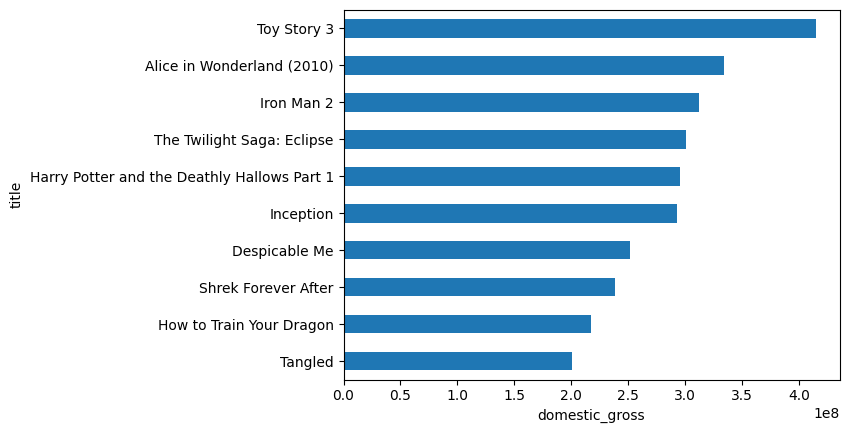

In [ ]:
first_five.groupby("title")["domestic_gross"].median().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel("domestic_gross")
#Toy story raised more domestic gross than the rest of the movie title

Text(0.5, 0, 'foreign_gross')

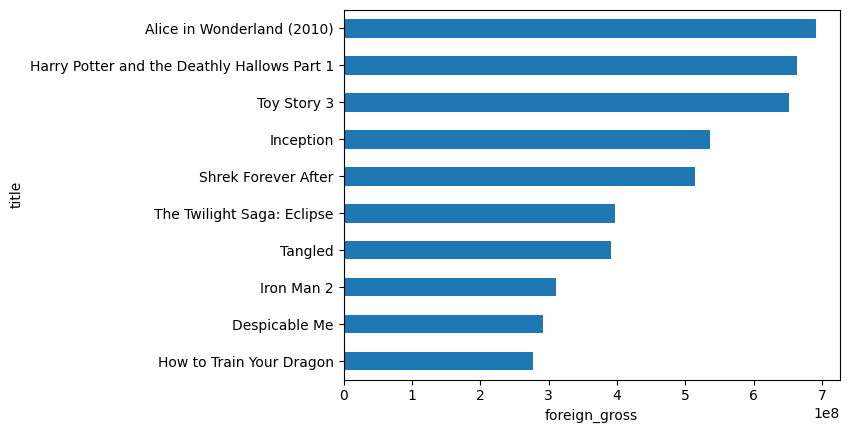

In [ ]:
first_five.groupby("title")["foreign_gross"].median().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel("foreign_gross")
#Alice in wonderland is the movie that was much sold outside the country than the rest of the movies thus raised more foreign gross than the rest of the movie title

In [ ]:
bom_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [ ]:
column_name = 'domestic_gross'
 #replace null values with 0
bom_df[column_name].fillna(value=0, inplace=True)

In [ ]:
column_name = 'foreign_gross'
 #replace null values with 0
bom_df[column_name].fillna(value=0, inplace=True)

In [ ]:
bom_df.isnull().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [ ]:
bom_df['Net_gross'] = bom_df['foreign_gross'] - bom_df['domestic_gross']

In [ ]:
bom_df.tail()

title      studio  domestic_gross foreign_gross  \
3382                    The Quake       Magn.          6200.0             0   
3383  Edward II (2018 re-release)          FM          4800.0             0   
3384                     El Pacto        Sony          2500.0             0   
3385                     The Swan  Synergetic          2400.0             0   
3386            An Actor Prepares       Grav.          1700.0             0   

      year  
3382  2018  
3383  2018  
3384  2018  
3385  2018  
3386  2018

Text(0.5, 0, 'domestic_gross')

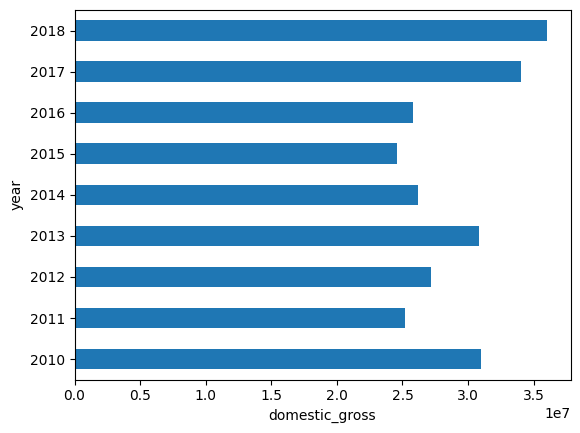

In [ ]:
bom_df = bom_df.sort_values('year')

bom_df.groupby("year")["domestic_gross"].mean().plot(kind = 'barh')
plt.xlabel("domestic_gross")
# In the year 2018 there was high domestic gross . the movies sold internally was more on the year 2018 than the rest of the years

In [ ]:
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'].str.replace(',', ''))

Text(0.5, 0, 'foreign_gross')

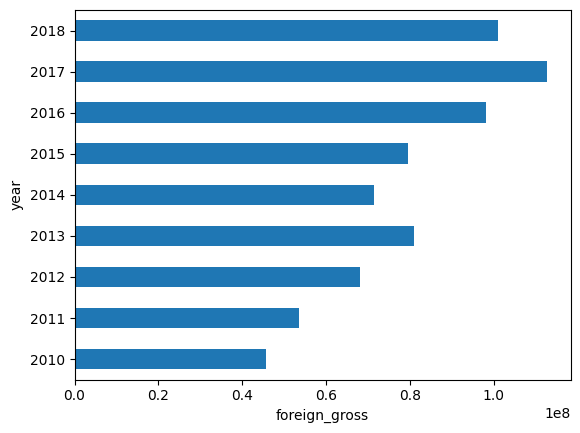

In [ ]:
bom_df = bom_df.sort_values('year')
bom_df.groupby("year")["foreign_gross"].mean().plot(kind = 'barh')
plt.xlabel("foreign_gross")
# 2017 had the highest number of movies sold outiside than the rest of the years

In [ ]:
budgets_df.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

In [ ]:
budgets_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [ ]:
import pandas as pd
# Convert the date column to datetime format
budgets_df['release_date'] = pd.to_datetime(budgets_df['release_date'], format='%b %d, %Y')

# Convert the date column to a specific format
budgets_df['release_date'] = budgets_df['release_date'].dt.strftime('%Y%m%d')



In [ ]:
budgets_df.head()

id release_date                                        movie  \
0   1     20091218                                       Avatar   
1   2     20110520  Pirates of the Caribbean: On Stranger Tides   
2   3     20190607                                 Dark Phoenix   
3   4     20150501                      Avengers: Age of Ultron   
4   5     20171215            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

In [ ]:
budgets_df['production_budget'] = budgets_df['production_budget'].str.replace('$', '')

<ipython-input-13-5a1b5e49585b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budgets_df['production_budget'] = budgets_df['production_budget'].str.replace('$', '')


In [ ]:
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].str.replace('$', '')

<ipython-input-14-42678cfb3700>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budgets_df['domestic_gross'] = budgets_df['domestic_gross'].str.replace('$', '')


In [ ]:
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].str.replace('$', '')

<ipython-input-15-e386c9dffbb8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].str.replace('$', '')


In [ ]:
budgets_df.head()

id release_date                                        movie  \
0   1     20091218                                       Avatar   
1   2     20110520  Pirates of the Caribbean: On Stranger Tides   
2   3     20190607                                 Dark Phoenix   
3   4     20150501                      Avengers: Age of Ultron   
4   5     20171215            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0       425,000,000    760,507,625   2,776,345,279  
1       410,600,000    241,063,875   1,045,663,875  
2       350,000,000     42,762,350     149,762,350  
3       330,600,000    459,005,868   1,403,013,963  
4       317,000,000    620,181,382   1,316,721,747

In [ ]:
budgets_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [ ]:
budgets_df['production_budget'] = pd.to_numeric(budgets_df['production_budget'].str.replace(',', ''))

In [ ]:
budgets_df['domestic_gross'] = pd.to_numeric(budgets_df['domestic_gross'].str.replace(',', ''))

In [ ]:
budgets_df['worldwide_gross'] = pd.to_numeric(budgets_df['worldwide_gross'].str.replace(',', ''))

In [ ]:
#budgets_df['release_date'] = budgets_df['release_date'].apply(lambda x: datetime.strptime(x, '%b /%d /%Y').strftime('%Y-%m-%d'))



In [ ]:
first_five = budgets_df.iloc[:5]

In [ ]:
first_five.head()

id release_date                                        movie  \
0   1     20091218                                       Avatar   
1   2     20110520  Pirates of the Caribbean: On Stranger Tides   
2   3     20190607                                 Dark Phoenix   
3   4     20150501                      Avengers: Age of Ultron   
4   5     20171215            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0          425000000       760507625       2776345279  
1          410600000       241063875       1045663875  
2          350000000        42762350        149762350  
3          330600000       459005868       1403013963  
4          317000000       620181382       1316721747

Text(0.5, 0, 'production_budget')

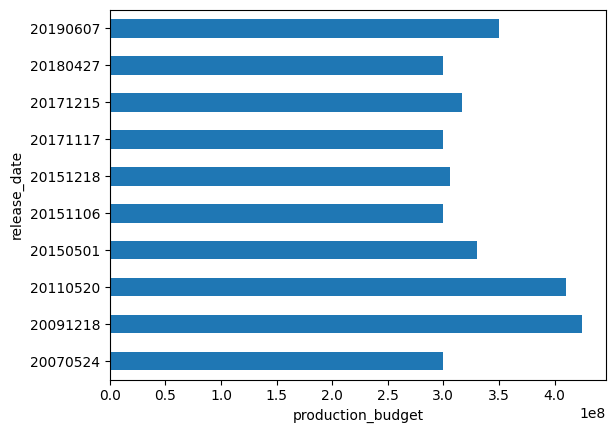

In [ ]:
first_five = first_five.sort_values('release_date')
first_five.groupby("release_date")["production_budget"].mean().plot(kind = 'barh')
plt.xlabel("production_budget")
#there was high budget in production in the year 2009

Text(0.5, 0, 'domestic_gross')

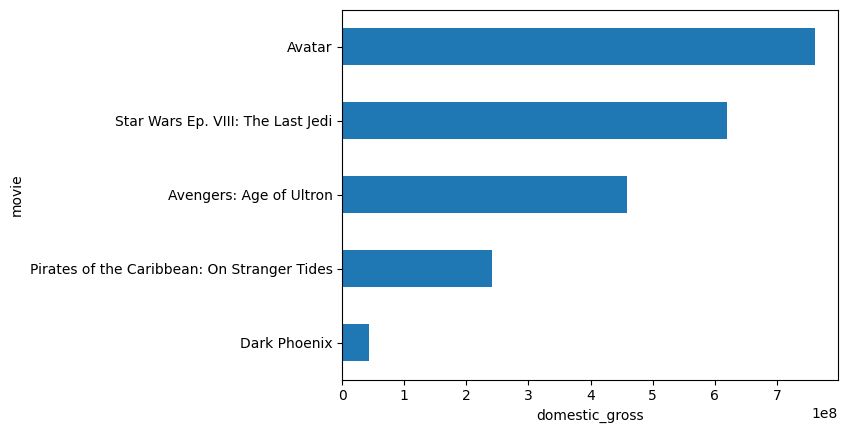

In [ ]:
first_five.groupby("movie")["domestic_gross"].mean().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel("domestic_gross")

Text(0.5, 0, 'worldwide_gross')

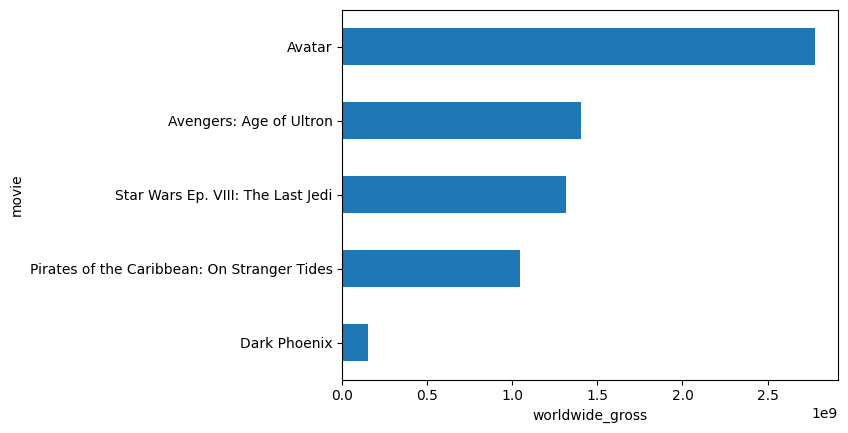

In [ ]:
first_five.groupby("movie")["worldwide_gross"].mean().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel("worldwide_gross")

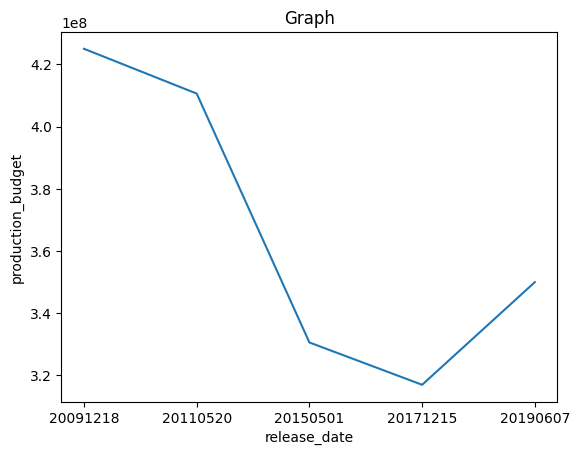

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# sort the data by 'x' column
first_five = first_five.sort_values('release_date')

# plot the data
plt.plot(first_five['release_date'], first_five['production_budget'])
plt.xlabel('release_date')
plt.ylabel('production_budget')
plt.title('Graph')
plt.show()


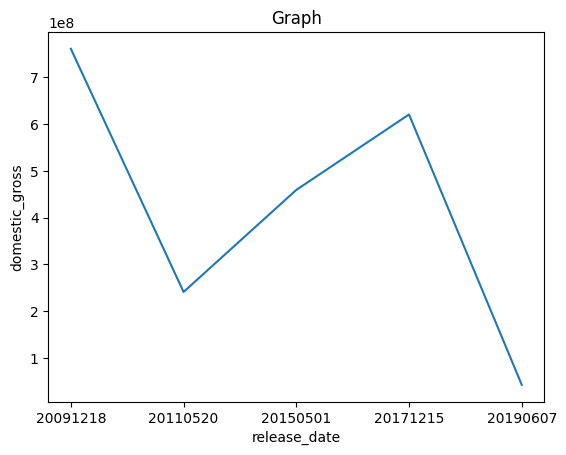

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# sort the data by 'x' column
first_five = first_five.sort_values('release_date')

# plot the data
plt.plot(first_five['release_date'], first_five['domestic_gross'])
plt.xlabel('release_date')
plt.ylabel('domestic_gross')
plt.title('Graph')
plt.show()

**RATING** **INFORMATION**

In [ ]:
rt_info_df = pd.read_csv('rt.movie_info.tsv.gz', sep='\t')

In [ ]:
rt_info_df.head()

id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2                   Allison Anders  Sep 13, 1996  Apr 18, 2000      NaN   
3  Paul Attanasio|Michael Crichton   Dec 9, 1994  Aug 27, 1997      NaN   
4                     Giles Cooper           NaN           NaN      NaN   

  box_office      runtime             studio  
0        NaN  104 minutes                NaN  
1    600,000  108 minutes  Entertainment One  
2        NaN  116 minutes                NaN  
3        NaN  128 minutes                NaN  
4        NaN  200 minutes                NaN

In [ ]:
rt_info_df.shape

(1560, 12)

In [ ]:
rt_info_df['runtime'] = rt_info_df['runtime'].str.replace('minutes', '')

In [ ]:
rt_info_df.head()

id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2                   Allison Anders  Sep 13, 1996  Apr 18, 2000      NaN   
3  Paul Attanasio|Michael Crichton   Dec 9, 1994  Aug 27, 1997      NaN   
4                     Giles Cooper           NaN           NaN      NaN   

  box_office runtime             studio  
0        NaN    104                 NaN  
1    600,000    108   Entertainment One  
2        NaN    116                 NaN  
3        NaN    128                 NaN  
4        NaN    200                 NaN

In [ ]:
rt_info_df.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [ ]:
column_name = 'runtime'
 #replace null values with 0
rt_info_df[column_name].fillna(value=0, inplace=True)

In [ ]:
rt_info_df = rt_info_df.dropna(subset=["rating"])

In [ ]:
rt_info_df['runtime'] = pd.to_numeric(rt_info_df['runtime'].str.replace(',', ''))

Text(0.5, 0, 'runtime')

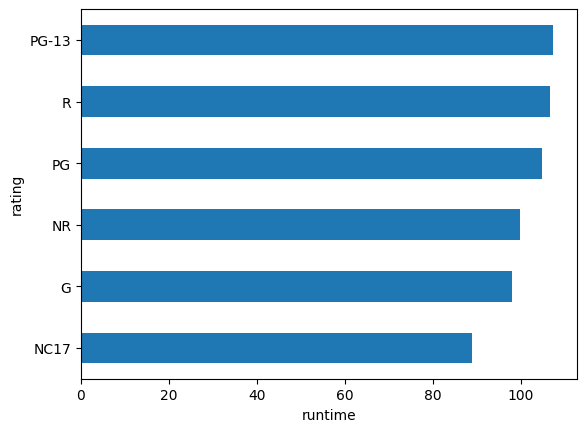

In [ ]:
rt_info_df.groupby("rating")["runtime"].mean().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel("runtime")

In [ ]:
first_ten = rt_info_df.iloc[:10]

Text(0.5, 0, 'runtime')

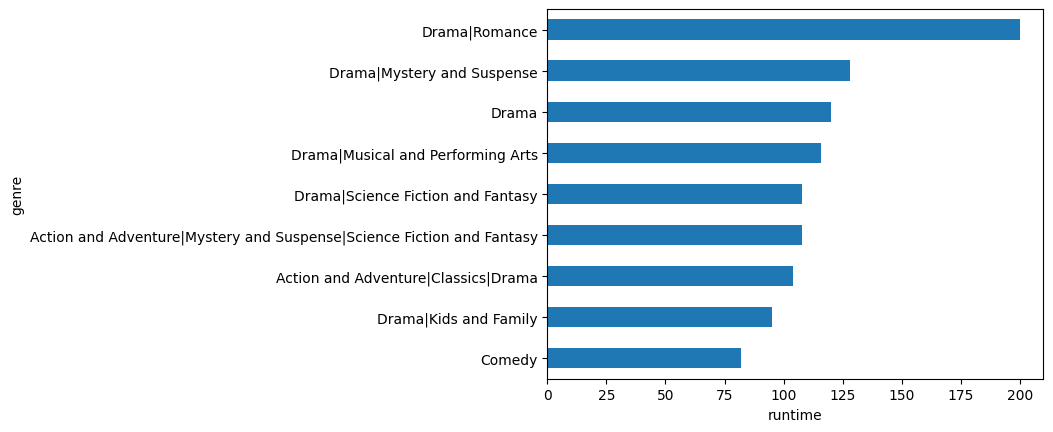

In [ ]:
first_ten.groupby("genre")["runtime"].mean().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel("runtime")

Text(0.5, 0, 'runtime')

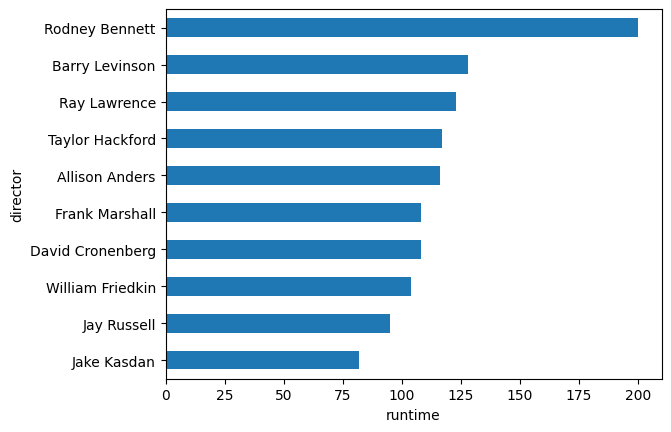

In [ ]:
first_ten.groupby("director")["runtime"].mean().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel("runtime")

Text(0.5, 0, 'runtime')

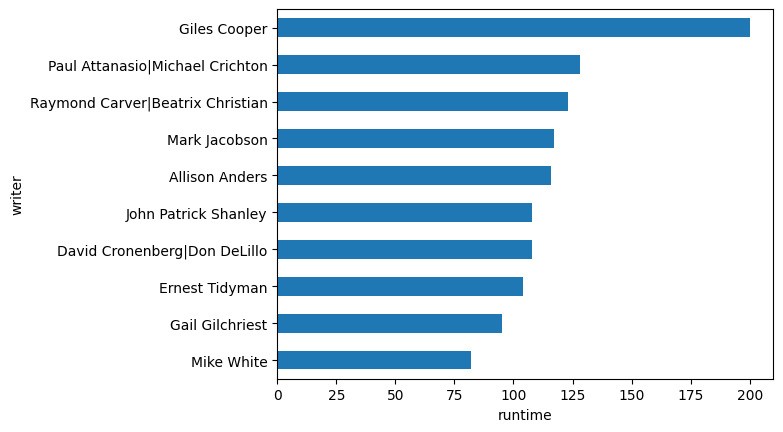

In [ ]:
first_ten.groupby("writer")["runtime"].mean().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel("runtime")

Text(0.5, 0, 'runtime')

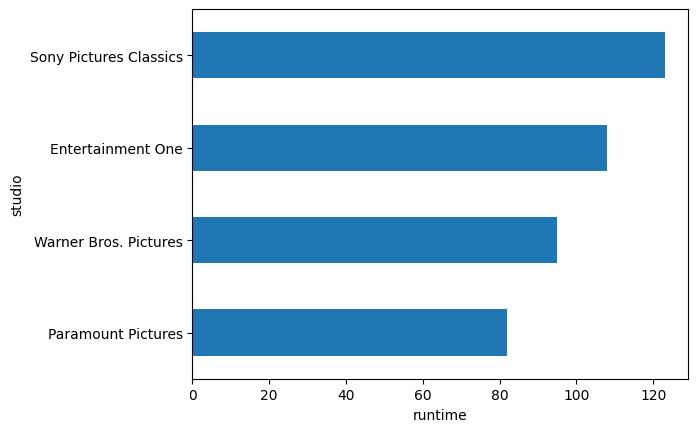

In [ ]:
first_ten.groupby("studio")["runtime"].mean().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel("runtime")

In [ ]:
num_duplicates = rt_info_df.duplicated(subset=['director']).sum()
num_duplicates


431

In [ ]:
rt_info_df.head(2)

id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   

                         writer  theater_date      dvd_date currency  \
0                Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1  David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   

  box_office  runtime             studio  
0        NaN    104.0                NaN  
1    600,000    108.0  Entertainment One

In [ ]:
#  Use one-hot encoding to create dummy variables for the 'fruit' column
dummy_df = pd.get_dummies(rt_info_df['rating'], prefix='rating')

# Concatenate the dummy variables with the original dataframe
df_encoded = pd.concat([rt_info_df, dummy_df], axis=1)
df_encoded.head()

id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2                   Allison Anders  Sep 13, 1996  Apr 18, 2000      NaN   
3  Paul Attanasio|Michael Crichton   Dec 9, 1994  Aug 27, 1997      NaN   
4                     Giles Cooper           NaN           NaN      NaN   

  box_office  runtime             studio  rating_G  rating_NC17  rating_NR  \
0        NaN    104.0                NaN         0            0          0   
1    600,000    108.0  Entertainment One         0            0          0   
2        NaN    116.0                NaN         0            0          0   
3        NaN    128.0                NaN         0            0          0   
4        NaN    200.0                NaN         0            0          1   

   rating_PG  rating_PG-13  rating_R  
0          0             0         1  
1          0             0         1  
2          0             0         1  
3          0             0         1  
4          0             0         0

In [ ]:
rt_info_df['rating'] = pd.to_numeric(rt_info_df['rating'])

In [ ]:
df_encoded = df_encoded.drop(['rating'], axis = 1)


In [ ]:
first_ten = df_encoded.iloc[:10]

In [ ]:
import pandas as pd
# Concatenate the desired columns horizontally
concatenated_col = pd.concat([df_encoded['rating_G'], df_encoded['rating_NC17'], df_encoded['rating_NR'], df_encoded['rating_PG'], df_encoded['rating_PG-13'], df_encoded['rating_R']], axis=1)

# Use apply along with a lambda function to join the values in each row into a single string
df_encoded['new_rating'] = concatenated_col.apply(lambda row: ''.join(row.values.astype(str)), axis=1)
df_encoded.head()


id                                           synopsis  \
0   1  This gritty, fast-paced, and innovative police...   
1   3  New York City, not-too-distant-future: Eric Pa...   
2   5  Illeana Douglas delivers a superb performance ...   
3   6  Michael Douglas runs afoul of a treacherous su...   
4   7                                                NaN   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2                   Allison Anders  Sep 13, 1996  Apr 18, 2000      NaN   
3  Paul Attanasio|Michael Crichton   Dec 9, 1994  Aug 27, 1997      NaN   
4                     Giles Cooper           NaN           NaN      NaN   

  box_office  runtime             studio  rating_G  rating_NC17  rating_NR  \
0        NaN    104.0                NaN         0            0          0   
1    600,000    108.0  Entertainment One         0            0          0   
2        NaN    116.0                NaN         0            0          0   
3        NaN    128.0                NaN         0            0          0   
4        NaN    200.0                NaN         0            0          1   

   rating_PG  rating_PG-13  rating_R new_rating  
0          0             0         1     000001  
1          0             0         1     000001  
2          0             0         1     000001  
3          0             0         1     000001  
4          0             0         0     001000

In [ ]:
first_ten = df_encoded.iloc[:10]

Text(0.5, 0, 'new_rating')

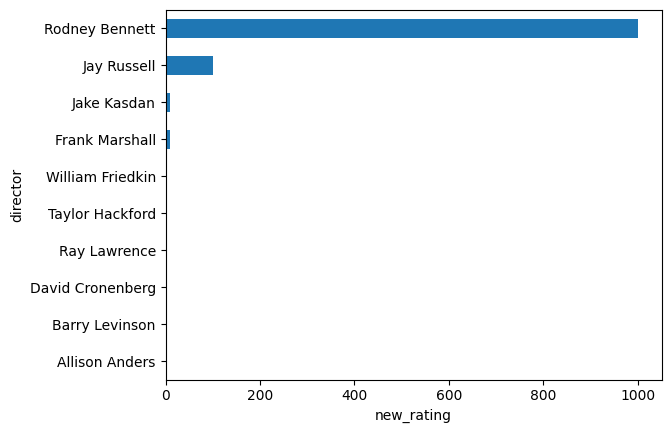

In [ ]:
first_ten.groupby("director")["new_rating"].median().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel("new_rating")

Text(0.5, 0, 'new_rating')

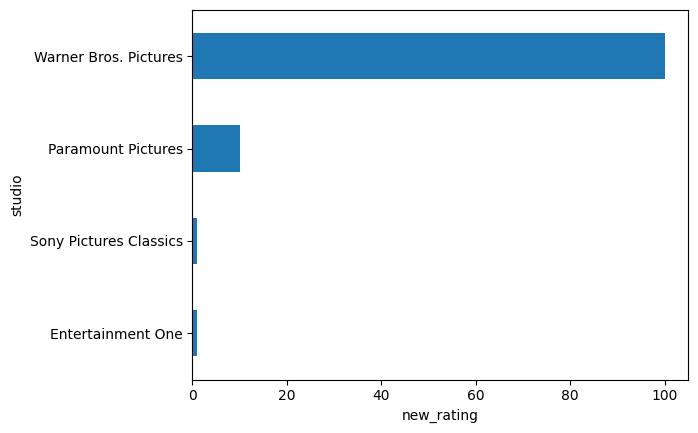

In [ ]:
first_ten.groupby("studio")["new_rating"].median().sort_values(ascending = True).plot(kind = 'barh')
# plt.xlim(0, 6)
# plt.xticks(np.arange(0, 11, 2))

plt.xlabel("new_rating")

In [ ]:
import matplotlib.pyplot as plt

# Data for the bar graph
x = df_encoded['new_rating']
y = df_encoded['director']

# Create the bar graph
plt.bar(x, y)

# Add labels and title
plt.xlabel("Rating")
plt.ylabel("Directors")
plt.title("Simple Bar Graph")

# Show the graph
plt.show()



**THE MOVIE DATABASE**

In [ ]:
tmdb_df = pd.read_csv('tmdb.movies.csv.gz')

In [ ]:
tmdb_df.head()

Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  
2                                    Iron Man 2           6.8       12368  
3                                     Toy Story           7.9       10174  
4                                     Inception           8.3       22186

In [ ]:
first_10 = tmdb_df.iloc[:10]

In [ ]:
first_10.head(12)

Unnamed: 0            genre_ids     id original_language  \
10          10      [16, 35, 10751]    863                en   
11          11      [10751, 14, 12]  12155                en   
12          12         [53, 12, 28]  27578                en   
13          13          [16, 10751]  38757                en   
14          14             [27, 80]  41439                en   
15          15  [12, 14, 18, 10749]  24021                en   
16          16        [28, 53, 878]  20504                en   
17          17       [10402, 10749]  52371                nl   
18          18         [28, 18, 53]   2502                en   
19          19       [18, 53, 9648]  11324                en   
20          20   [28, 18, 9648, 53]   2501                en   
21          21             [28, 35]  37834                en   

                original_title  popularity release_date  \
10                 Toy Story 2      22.698   1999-11-24   
11         Alice in Wonderland      22.020   2010-03-05   
12             The Expendables      21.517   2010-08-03   
13                     Tangled      21.511   2010-11-24   
14                      Saw 3D      20.370   2010-10-28   
15  The Twilight Saga: Eclipse      20.340   2010-06-23   
16             The Book of Eli      18.985   2010-01-11   
17                  LelleBelle      18.586   2010-10-09   
18        The Bourne Supremacy      18.199   2004-07-23   
19              Shutter Island      18.060   2010-02-18   
20         The Bourne Identity      17.935   2002-06-14   
21              Knight and Day      17.713   2010-06-23   

                         title  vote_average  vote_count  
10                 Toy Story 2           7.5        7553  
11         Alice in Wonderland           6.6        8713  
12             The Expendables           6.1        4647  
13                     Tangled           7.5        6407  
14      Saw: The Final Chapter           6.0        1488  
15  The Twilight Saga: Eclipse           6.0        4909  
16             The Book of Eli           6.7        3495  
17                  LelleBelle           4.5          36  
18        The Bourne Supremacy           7.3        4367  
19              Shutter Island           8.1       12625  
20         The Bourne Identity           7.4        5406  
21              Knight and Day           6.0        2494

Text(0.5, 0, 'popularity')

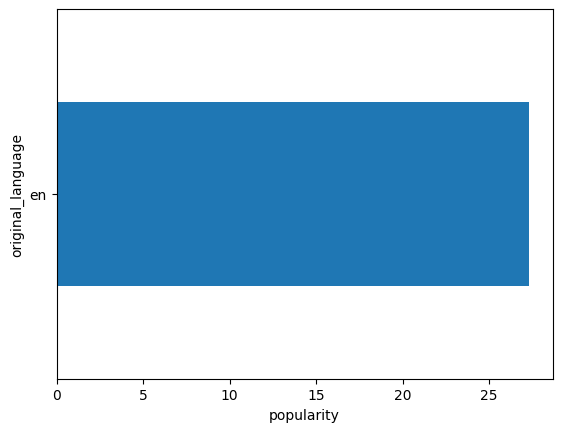

In [ ]:
first_10.groupby("original_language")["popularity"].median().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel("popularity")
#The most used language is english

In [ ]:
unique_count = tmdb_df["original_language"].nunique()
unique_count


76

In [ ]:
import pandas as pd
# Specify the name of the column you want to analyze
column_name = "original_language"

# Concatenate all the values in the column into a single string
all_text = ' '.join(tmdb_df['original_language'].astype(str))

# Split the text into individual words
words = all_text.split()

# Count the frequency of each word
word_freq = {}
for word in words:
  if word in word_freq:
    word_freq[word] += 1
  else:
    word_freq[word] = 1

# Find the most common word and its frequency
most_common_word = max(word_freq, key=word_freq.get)
frequency = word_freq[most_common_word]

# Print the result
print("The most common word in column", column_name, "is '", most_common_word, "' with a frequency of", frequency)


The most common word in column original_language is ' en ' with a frequency of 23291


In [ ]:
tmdb_df['original_language'].unique()

array(['en', 'nl', 'es', 'ja', 'sv', 'de', 'fr', 'cn', 'it', 'ru', 'zh',
       'hi', 'no', 'ko', 'da', 'fi', 'pl', 'te', 'hu', 'tr', 'pt', 'he',
       'fa', 'th', 'cs', 'et', 'tl', 'lt', 'xx', 'bs', 'ar', 'is', 'el',
       'mr', 'hr', 'ro', 'sr', 'uk', 'nb', 'hz', 'ca', 'bg', 'sl', 'lv',
       'si', 'ab', 'ta', 'bo', 'id', 'sq', 'bn', 'gu', 'lo', 'ne', 'kk',
       'hy', 'ps', 'kn', 'vi', 'ku', 'ka', 'ml', 'ur', 'mi', 'eu', 'sn',
       'cy', 'ha', 'ky', 'yi', 'pa', 'xh', 'cr', 'sw', 'af', 'dz'],
      dtype=object)

In [ ]:
first_10.head(10)

Unnamed: 0                 genre_ids     id original_language  \
0           0           [12, 14, 10751]  12444                en   
1           1       [14, 12, 16, 10751]  10191                en   
2           2             [12, 28, 878]  10138                en   
3           3           [16, 35, 10751]    862                en   
4           4             [28, 878, 12]  27205                en   
5           5           [12, 14, 10751]  32657                en   
6           6         [28, 12, 14, 878]  19995                en   
7           7           [16, 10751, 35]  10193                en   
8           8           [16, 10751, 35]  20352                en   
9           9  [16, 28, 35, 10751, 878]  38055                en   

                                      original_title  popularity release_date  \
0       Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                           How to Train Your Dragon      28.734   2010-03-26   
2                                         Iron Man 2      28.515   2010-05-07   
3                                          Toy Story      28.005   1995-11-22   
4                                          Inception      27.920   2010-07-16   
5  Percy Jackson & the Olympians: The Lightning T...      26.691   2010-02-11   
6                                             Avatar      26.526   2009-12-18   
7                                        Toy Story 3      24.445   2010-06-17   
8                                      Despicable Me      23.673   2010-07-09   
9                                           Megamind      22.855   2010-11-04   

                                               title  vote_average  vote_count  
0       Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                           How to Train Your Dragon           7.7        7610  
2                                         Iron Man 2           6.8       12368  
3                                          Toy Story           7.9       10174  
4                                          Inception           8.3       22186  
5  Percy Jackson & the Olympians: The Lightning T...           6.1        4229  
6                                             Avatar           7.4       18676  
7                                        Toy Story 3           7.7        8340  
8                                      Despicable Me           7.2       10057  
9                                           Megamind           6.8        3635

Text(0.5, 0, 'popularity')

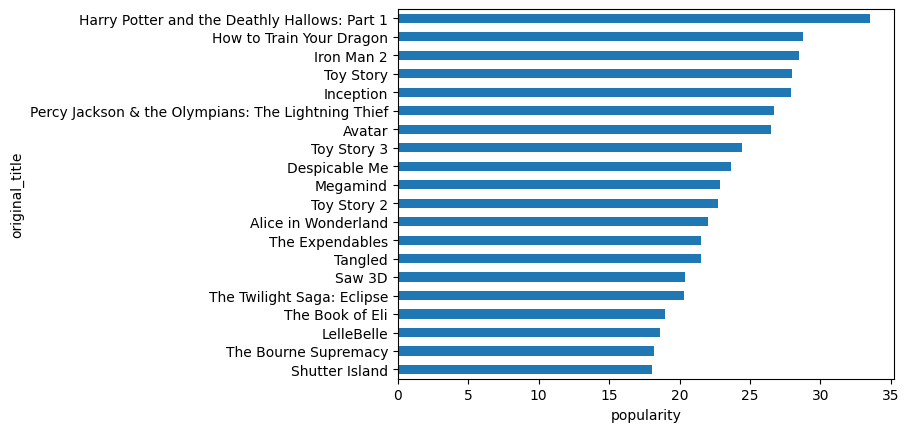

In [ ]:
first_10.groupby("original_title")["popularity"].median().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel("popularity")
#From this table we can say that Harry Potter and the Deathly Hallows:Part 1 is the most popular of all the other movies

Text(0.5, 0, 'popularity')

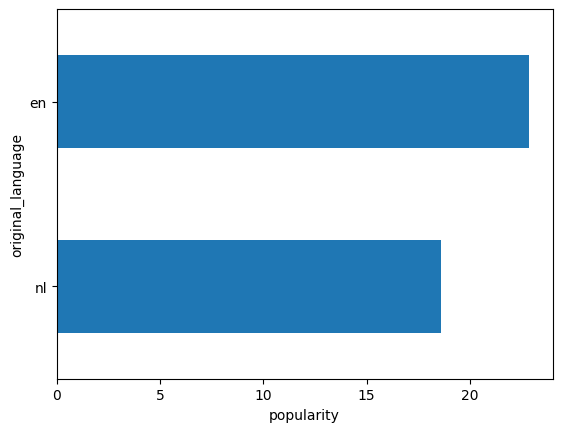

In [ ]:
first_10.groupby("original_language")["popularity"].median().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel("popularity")
#The most popular language used in movies is english followed by dutch

Text(0.5, 0, 'vote_count')

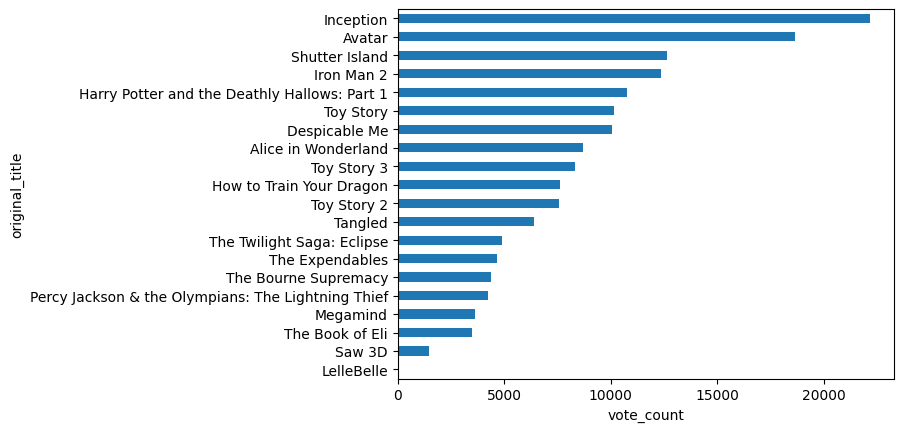

In [ ]:
first_10.groupby("original_title")["vote_count"].median().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel("vote_count")
#Movie title with the highest vote count is ICEPTION


Text(0.5, 0, 'vote_average')

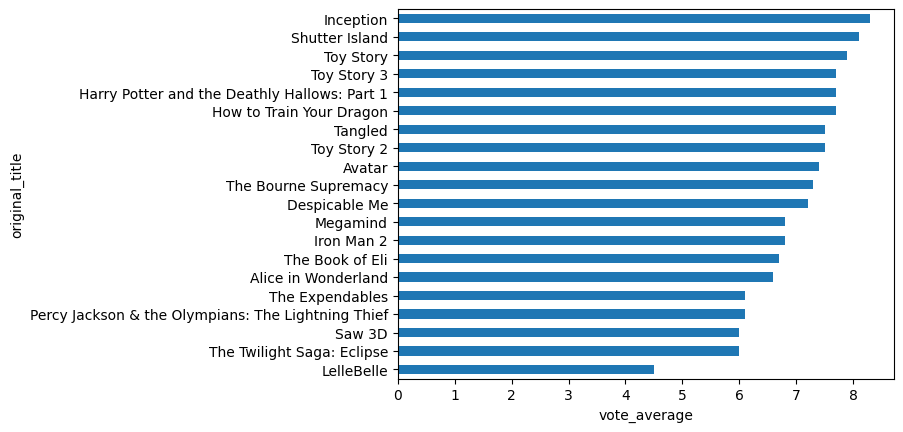

In [ ]:
first_10.groupby("original_title")["vote_average"].median().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel("vote_average")


In [ ]:
num_duplicates = tmdb_df.duplicated(subset=['title']).sum()
num_duplicates


1829

In [ ]:
tmdb_df.corr()

<ipython-input-127-75ec3f0b9360>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tmdb_df.corr()


Unnamed: 0        id  popularity  vote_average  vote_count
Unnamed: 0      1.000000  0.836647    0.028741      0.086375   -0.022948
id              0.836647  1.000000   -0.148720      0.116085   -0.130221
popularity      0.028741 -0.148720    1.000000      0.065273    0.694849
vote_average    0.086375  0.116085    0.065273      1.000000    0.086370
vote_count     -0.022948 -0.130221    0.694849      0.086370    1.000000